In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
import mediapipe as mp

Imagen de prueba

In [2]:
# Ruta de la imagen
img_path = r"images\imagenes_MVP\WhatsApp Image 2024-11-28 at 15.43.14.jpeg"

# Leer la imagen
img = cv2.imread(img_path)

## Preprocesamiento

Detección y recorte Mediapipe

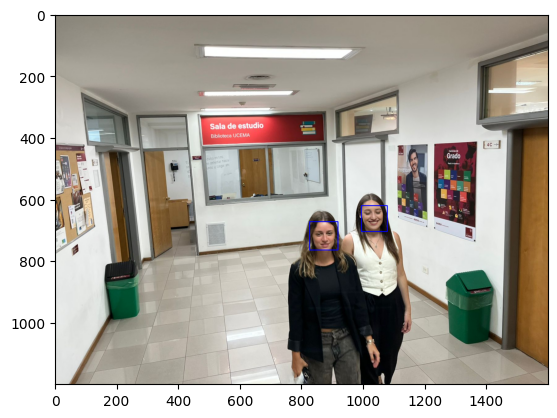

In [3]:
# Inicializa MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Convierte la imagen a RGB (MediaPipe espera imágenes en RGB)
img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inicializa el detector de rostros de MediaPipe
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.7) as face_detection:
    # Procesa la imagen
    results = face_detection.process(rgb_img)

# Lista para almacenar las coordenadas de los rostros
faces = []

# Verifica si se detectaron rostros
if results.detections:
    for detection in results.detections:
        # Obtiene las coordenadas del bounding box
        bboxC = detection.location_data.relative_bounding_box
        ih, iw, _ = img.shape
        x = int(bboxC.xmin * iw)
        y = int(bboxC.ymin * ih)
        w = int(bboxC.width * iw)
        h = int(bboxC.height * ih)
        # Guarda las coordenadas en el formato (x, y, w, h)
        faces.append((x, y, w, h))
        # Dibuja un rectángulo alrededor del rostro detectado
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Muestra la imagen con los rostros detectados
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


Defino una función para preprocesamiento de los rostros

In [4]:
# Definir la función para preprocesar la cara
def preprocess_face(face_img):
    # Redimensionar la cara al tamaño requerido por el modelo
    face_resized = cv2.resize(face_img, (224, 224))
    
    # Convertir la imagen a formato array y preprocesar (según el modelo)
    face_array = np.array(face_resized)
    
    # Expandir las dimensiones para que tenga el formato (1, 224, 224, 3)
    face_array = np.expand_dims(face_array, axis=0)
    
    # Aplicar la preprocesación de ResNet50
    face_preprocessed = preprocess_input(face_array)
    
    return face_preprocessed

## Usar modelos guardados como .pd 

In [5]:
model_path = "models/ResNet50_classification_model"
custom_model = keras.layers.TFSMLayer(model_path, call_endpoint='serving_default')

In [6]:
names = ["1.niños", "2.adolescentes", "3.jovenes_adultos", "4.adultos", "5.adultos_mayores", "6.tercera_edad"]

{'output_0': <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12385435, 0.25643227, 0.35544962, 0.12133033, 0.04812785,
        0.09480558]], dtype=float32)>}


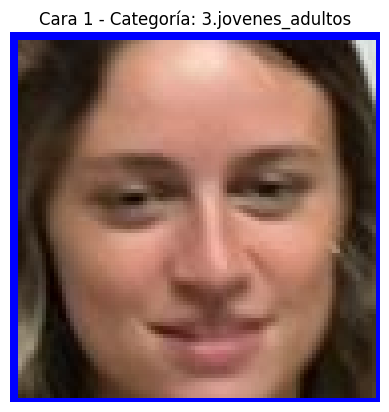

{'output_0': <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.04993804, 0.2013503 , 0.46686348, 0.07333422, 0.1726161 ,
        0.03589781]], dtype=float32)>}


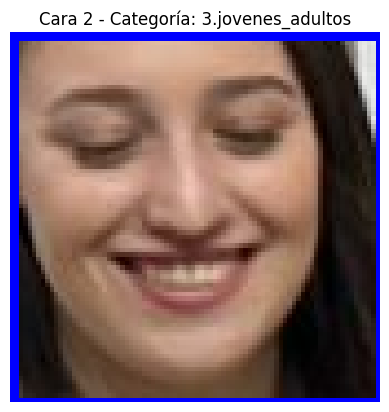

In [7]:
# Detectar y procesar las caras
for i, (x, y, w, h) in enumerate(faces):
    # Recortar la cara de la imagen original
    face = img[y:y+h, x:x+w]

    # Preprocesar la cara para hacer predicciones
    face_preprocessed = preprocess_face(face)  # Asegúrate de normalizar y ajustar el tamaño correctamente
    face_preprocessed = np.expand_dims(face_preprocessed, axis=0)  # Añadir una dimensión para batch_size=1

    # Hacer la predicción con el modelo TFSMLayer
    prediction_dict = custom_model(face_preprocessed)  # El modelo devuelve un diccionario
    prediction = prediction_dict['output_0']  # Extraer el tensor de probabilidades
    prediction = prediction.numpy()  # Convertir a un array de numpy

    # Obtener el índice de la clase con mayor probabilidad
    predicted_class = np.argmax(prediction[0])  # Como prediction tiene forma (1, 6), seleccionamos la primera fila

    # Obtener el nombre de la categoría predicha
    predicted_category = names[predicted_class]  # Mapear el índice a la etiqueta

    # Mostrar la cara usando matplotlib
    plt.figure()
    print(custom_model(face_preprocessed))
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB
    plt.title(f'Cara {i+1} - Categoría: {predicted_category}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()


## Usar modelos guardados como .keras

In [8]:
# Cargar el modelo guardado
custom_model = load_model("models\model_ResNet50.keras")

c:\Users\marti\OneDrive\Documentos\UCEMA\TFG\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.123854 0.256432 0.35545  0.12133  0.048128 0.094806]]


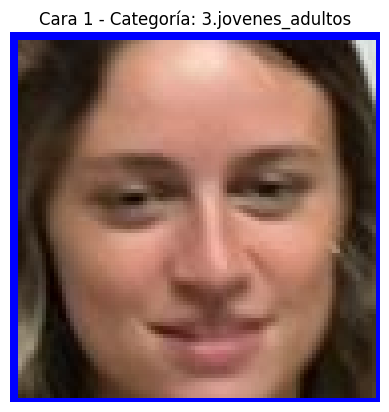

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[0.049938 0.20135  0.466863 0.073334 0.172616 0.035898]]


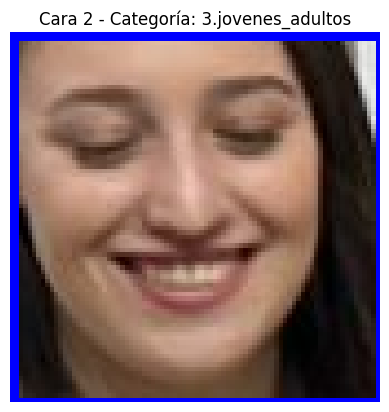

In [9]:
names = ["1.niños", "2.adolescentes", "3.jovenes_adultos", "4.adultos", "5.adultos_mayores", "6.tercera_edad"]

np.set_printoptions(suppress=True, precision=6)
# Detectar y procesar las caras
for i, (x, y, w, h) in enumerate(faces):
    # Recortar la cara de la imagen original
    face = img[y:y+h, x:x+w]

    # Preprocesar la cara para hacer predicciones
    face_preprocessed = preprocess_face(face)
    #print(face_preprocessed)
    
    
    # Hacer la predicción con el modelo
    prediction = custom_model.predict(face_preprocessed)
    
    # Obtener la clase predicha (categoría) con el índice de mayor probabilidad
    predicted_class = np.argmax(prediction, axis=1)[0]  # Obtener el índice de la clase
    
    # Obtener el nombre de la categoría predicha
    predicted_category = names[predicted_class]

    # Mostrar la cara usando matplotlib
    plt.figure()
    print(custom_model.predict(face_preprocessed))
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB
    plt.title(f'Cara {i+1} - Categoría: {predicted_category}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

---